<p style="font: 30px Georgia; 
          text-decoration: underline; 
          text-align:center; 
          padding:20px; 
          background-color:PapayaWhip "> 
    ANALYSIS & PREDICTION OF SCHIZOPHERNIA

</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Importing The Required Libraries 
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import accuracy_score

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Exploratory Data Analysis 
</p>

In [2]:
df = pd.read_excel("HO5/healthy control1.xlsx")

In [3]:
df

Time  Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
0         0.000     0.002500     0.002500     0.002500      0.00250   
1         0.004     0.002500     0.002500     0.002500      0.00250   
2         0.008     0.002500     0.002500     0.002500      0.00250   
3         0.012     0.461215     0.461215     0.308310      0.30831   
4         0.016     0.461215     0.461215     0.461215      0.30831   
...         ...          ...          ...          ...          ...   
442495  844.980     0.002500     0.002500     0.002500      0.00250   
442496  844.984     0.002500     0.002500     0.002500      0.00250   
442497  844.988     0.002500     0.002500     0.002500      0.00250   
442498  844.992     0.002500     0.002500     0.002500      0.00250   
442499  844.996     0.002500     0.002500     0.002500      0.00250   

        Electrode 5  Electrode 6  Electrode 7  Electrode 8  Electrode 9  ...  \
0          0.002500       0.0025       0.0025     0.002500     0.002500  ...   
1          0.002500       0.0025       0.0025     0.002500     0.002500  ...   
2          0.002500       0.0025       0.0025     0.002500     0.002500  ...   
3          0.155405       0.0025       0.0025    -0.150405    -0.150405  ...   
4          0.155405       0.0025       0.0025    -0.150405    -0.150405  ...   
...             ...          ...          ...          ...          ...  ...   
442495     0.002500       0.0025       0.0025     0.002500     0.002500  ...   
442496     0.002500       0.0025       0.0025     0.002500     0.002500  ...   
442497     0.002500       0.0025       0.0025     0.002500     0.002500  ...   
442498     0.002500       0.0025       0.0025     0.002500     0.002500  ...   
442499     0.002500       0.0025       0.0025     0.002500     0.002500  ...   

        Electrode 11  Electrode 12  Electrode 13  Electrode 14  Electrode 15  \
0             0.0025      0.002500        0.0025        0.0025      0.002500   
1             0.0025      0.002500        0.0025        0.0025      0.002500   
2             0.0025      0.002500        0.0025        0.0025      0.002500   
3             0.0025      0.002500        0.0025        0.0025     -0.150405   
4             0.0025      0.155405        0.0025        0.0025     -0.150405   
...              ...           ...           ...           ...           ...   
442495        0.0025      0.002500        0.0025        0.0025      0.002500   
442496        0.0025      0.002500        0.0025        0.0025      0.002500   
442497        0.0025      0.002500        0.0025        0.0025      0.002500   
442498        0.0025      0.002500        0.0025        0.0025      0.002500   
442499        0.0025      0.002500        0.0025        0.0025      0.002500   

        Electrode 16  Electrode 17  Electrode 18  Electrode 19  class  
0            0.00250        0.0025        0.0025      0.002500     ho  
1            0.00250        0.0025        0.0025      0.002500     ho  
2            0.00250        0.0025        0.0025      0.002500     ho  
3           -0.30331        0.0025        0.0025     -0.303310     ho  
4           -0.30331        0.0025        0.0025     -0.150405     ho  
...              ...           ...           ...           ...    ...  
442495       0.00250        0.0025        0.0025      0.002500     so  
442496       0.00250        0.0025        0.0025      0.002500     so  
442497       0.00250        0.0025        0.0025      0.002500     so  
442498       0.00250        0.0025        0.0025      0.002500     so  
442499       0.00250        0.0025        0.0025      0.002500     so  

[442500 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442500 entries, 0 to 442499
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          442500 non-null  float64
 1   Electrode 1   442500 non-null  float64
 2   Electrode 2   442500 non-null  float64
 3   Electrode 3   442500 non-null  float64
 4   Electrode 4   442500 non-null  float64
 5   Electrode 5   442500 non-null  float64
 6   Electrode 6   442500 non-null  float64
 7   Electrode 7   442500 non-null  float64
 8   Electrode 8   442500 non-null  float64
 9   Electrode 9   442500 non-null  float64
 10  Electrode 10  442500 non-null  float64
 11  Electrode 11  442500 non-null  float64
 12  Electrode 12  442500 non-null  float64
 13  Electrode 13  442500 non-null  float64
 14  Electrode 14  442500 non-null  float64
 15  Electrode 15  442500 non-null  float64
 16  Electrode 16  442500 non-null  float64
 17  Electrode 17  442500 non-null  float64
 18  Elec

In [5]:
df.describe().T

count        mean         std         min         25%  \
Time          442500.0  443.401955  257.037122    0.000000  221.248000   
Electrode 1   442500.0   -0.000431   10.881989 -190.058581   -5.043369   
Electrode 2   442500.0   -0.000160    8.670178  -81.648841   -5.043369   
Electrode 3   442500.0    0.004649    6.453641  -54.278822   -3.973033   
Electrode 4   442500.0    0.007734    9.402291  -62.535699   -5.196275   
Electrode 5   442500.0    0.007105   15.213912  -85.624375   -7.184041   
Electrode 6   442500.0   -0.000494    9.864230 -192.810873   -4.431749   
Electrode 7   442500.0    0.000263    8.229415 -106.878188   -4.431749   
Electrode 8   442500.0    0.002144    6.531230 -284.401048   -3.361413   
Electrode 9   442500.0    0.007536    9.392730  -55.502063   -4.278844   
Electrode 10  442500.0    0.005540   14.660874  -87.153426   -6.878231   
Electrode 11  442500.0   -0.002079    6.537604 -167.428621   -3.514318   
Electrode 12  442500.0    0.003554    5.405282  -40.976076   -3.208508   
Electrode 13  442500.0    0.010404    7.257808  -39.905740   -4.431749   
Electrode 14  442500.0   -0.000083    6.705055 -111.618247   -3.820128   
Electrode 15  442500.0    0.001153    5.360374  -33.636629   -3.208508   
Electrode 16  442500.0    0.009288    6.529125  -40.976076   -3.514318   
Electrode 17  442500.0   -0.000566    5.713016  -58.254356   -3.055603   
Electrode 18  442500.0   -0.000661    5.187298  -63.758941   -2.749792   
Electrode 19  442500.0    0.006776    7.467349  -42.810937   -4.278844   

                   50%         75%          max  
Time          442.4980  663.748000   924.996000  
Electrode 1     0.0025    5.201275   129.054432  
Electrode 2     0.0025    5.048369    79.971885  
Electrode 3     0.0025    3.825128    60.552933  
Electrode 4     0.0025    5.048369    64.375561  
Electrode 5     0.0025    7.036136    95.415303  
Electrode 6     0.0025    4.436749   164.375518  
Electrode 7     0.0025    4.436749   129.666053  
Electrode 8     0.0025    3.366413  1198.320029  
Electrode 9     0.0025    4.130939    77.984118  
Electrode 10    0.0025    6.730326    94.956588  
Electrode 11    0.0025    3.519318    58.565166  
Electrode 12    0.0025    3.213508    75.690541  
Electrode 13    0.0025    4.130939    50.767004  
Electrode 14    0.0025    3.825128   101.990224  
Electrode 15    0.0025    3.213508    38.381688  
Electrode 16    0.0025    3.366413    48.779237  
Electrode 17    0.0025    3.213508    38.534594  
Electrode 18    0.0025    2.907698    32.112578  
Electrode 19    0.0025    4.130939    48.473427

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Data Visualisation 
</p>

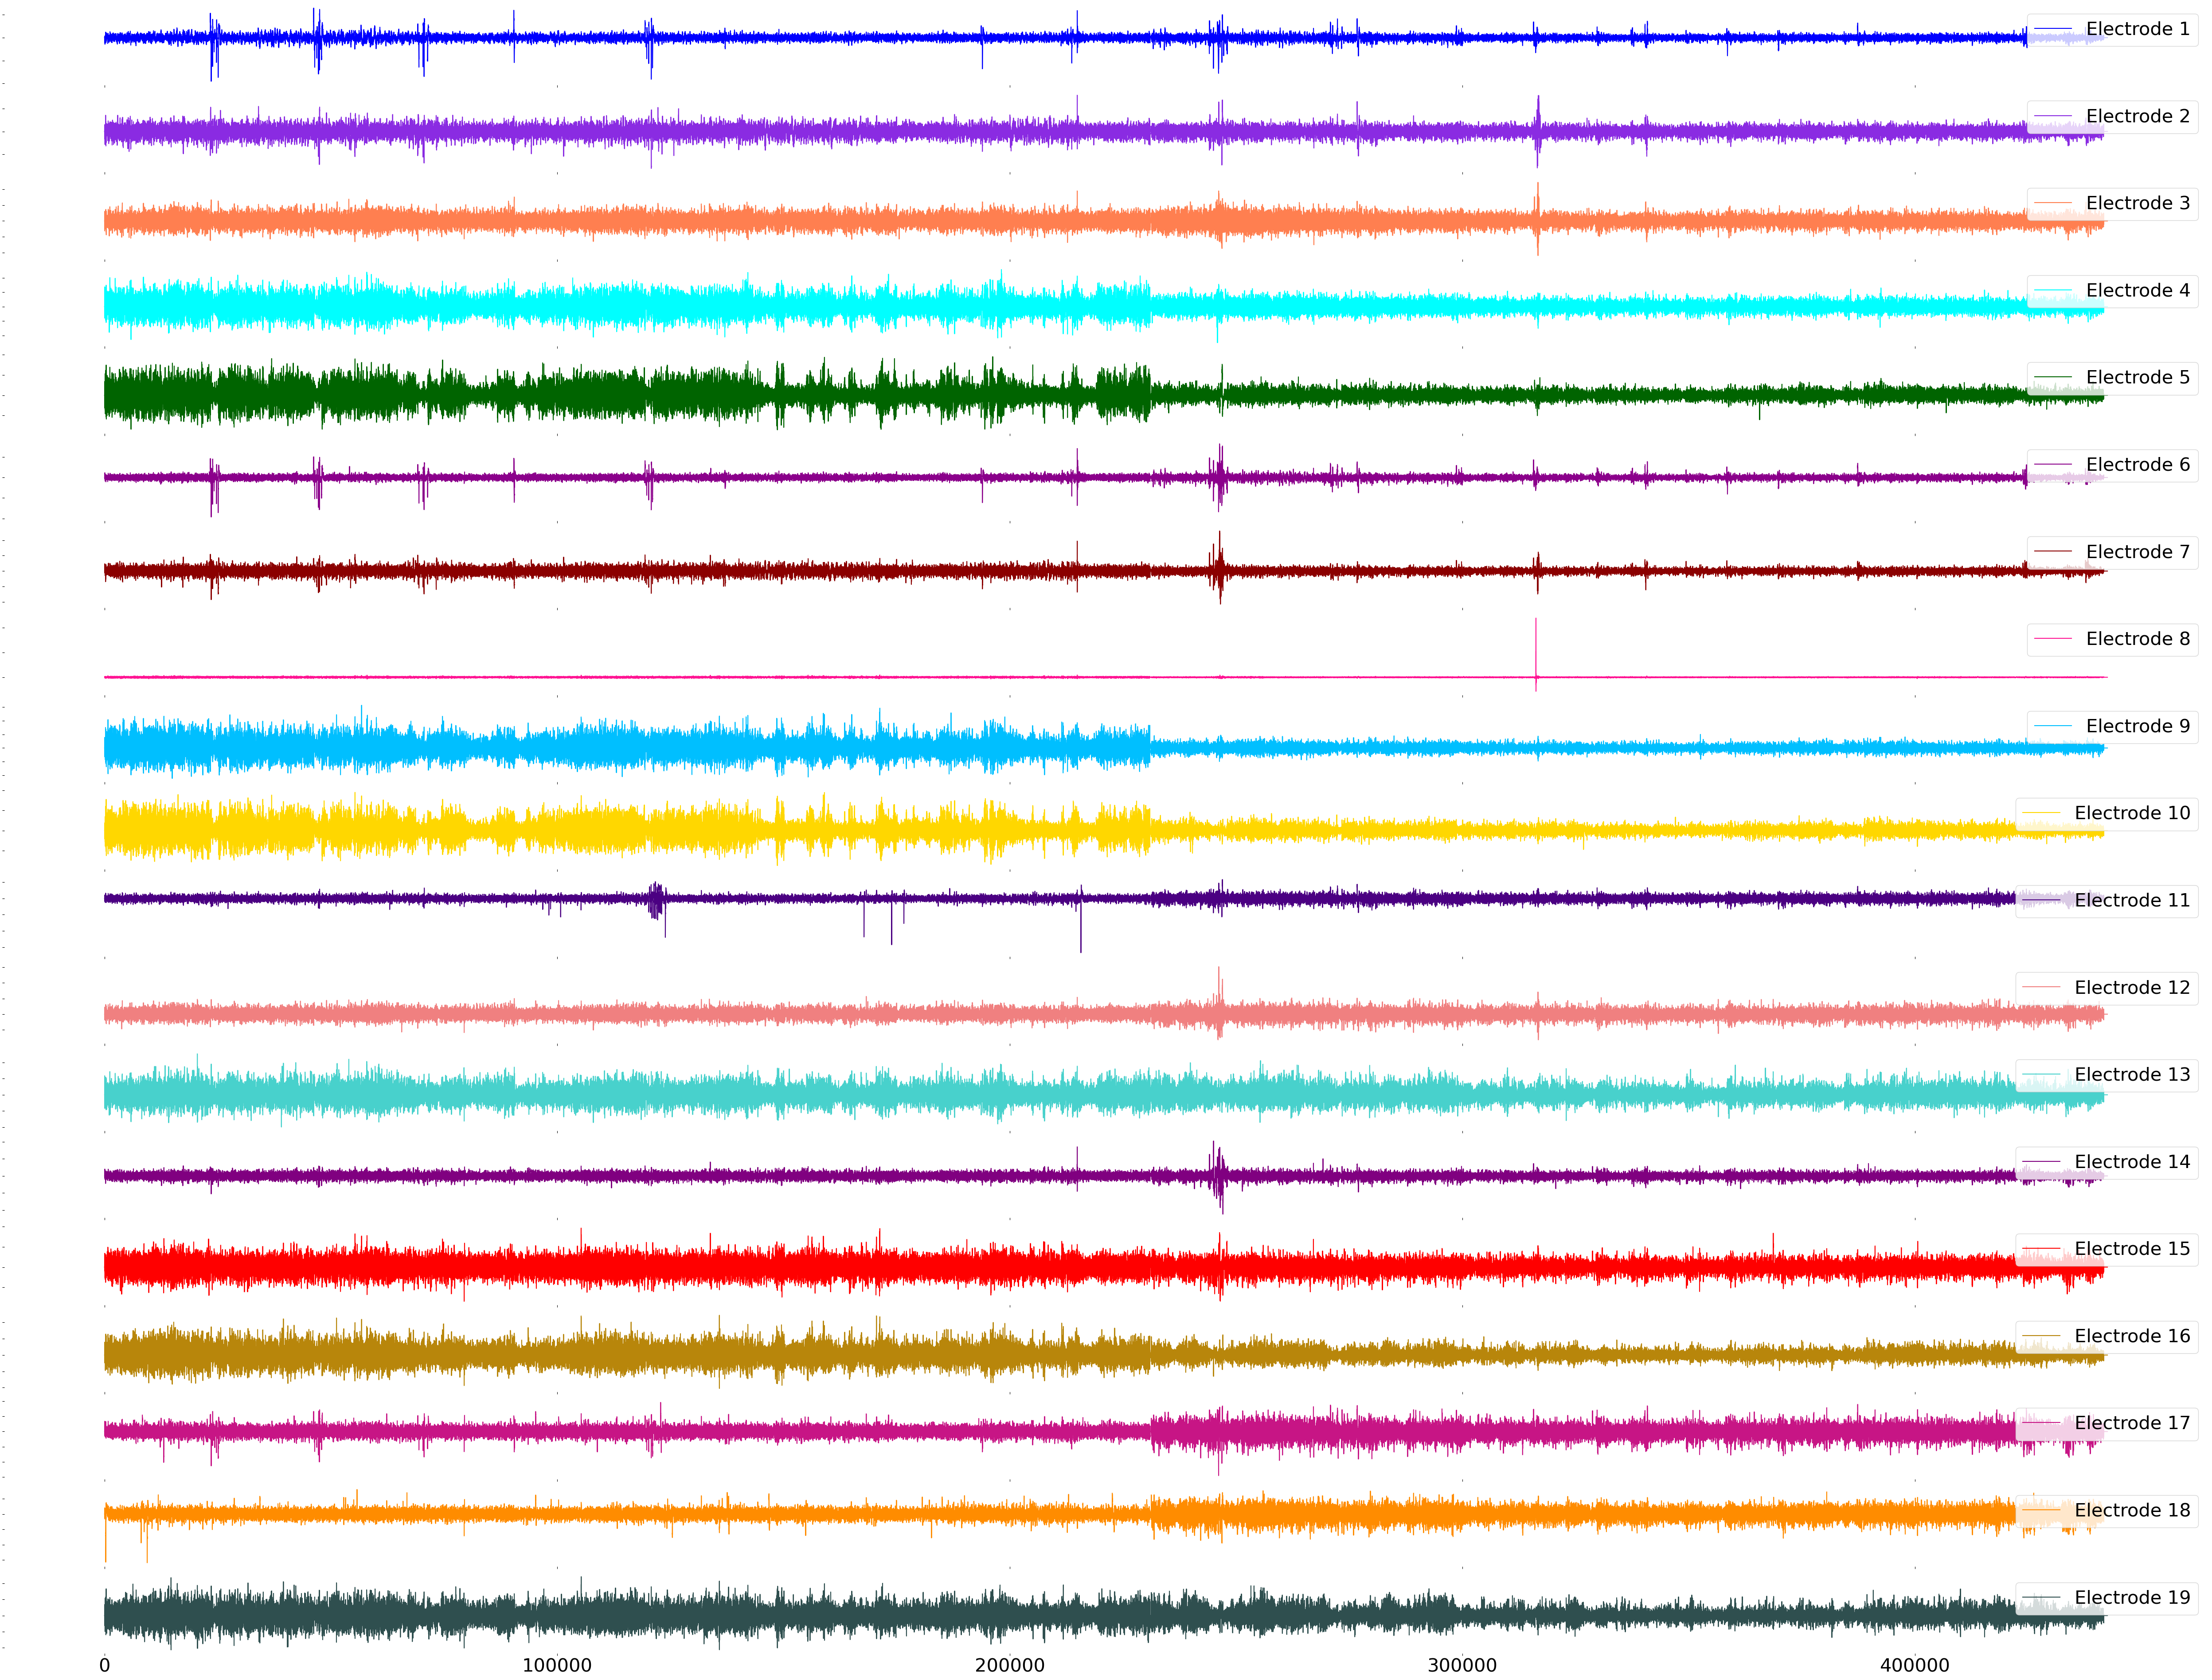

In [6]:
# Define the electrodes and eeg_data
electrodes = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6', 'Electrode 7', 
              'Electrode 8', 'Electrode 9', 'Electrode 10', 'Electrode 11', 'Electrode 12', 'Electrode 13', 'Electrode 14', 
              'Electrode 15', 'Electrode 16', 'Electrode 17', 'Electrode 18', 'Electrode 19']
eeg_data = df[electrodes]

# Define a color palette for the electrodes
color_palette = ['#0000FF', '#8A2BE2', '#FF7F50', '#00FFFF', '#006400', '#8B008B', '#8B0000', '#FF1493', '#00BFFF', '#FFD700', 
                 '#4B0082', '#F08080', '#48D1CC', '#800080', '#FF0000', '#B8860B', '#C71585', '#FF8C00', '#2F4F4F']
# Plot each electrode as a separate EEG signal in subplots
fig, axs = plt.subplots(len(electrodes), 1, figsize=(50, 2 * len(electrodes)), sharex=True)
for i, electrode in enumerate(electrodes):
    color = color_palette[i % len(color_palette)]
    axs[i].plot(df[electrode], color=color)
    axs[i].set_yticklabels([])
    
    axs[i].legend([electrode], loc='upper right', fontsize=30)  # Add legend instead of title
    axs[i].spines['top'].set_visible(False)  # Hide top border
    axs[i].spines['bottom'].set_visible(False)  # Hide bottom border
    axs[i].spines['left'].set_visible(False)  # Hide left border
    axs[i].spines['right'].set_visible(False)  # Hide right border

plt.xticks(fontsize=30)
plt.tight_layout()

plt.savefig('eeg_plot.png', dpi=300)
plt.show()

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Label Encoding 
</p>

In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Splitting the Dataset for Training and Testing 
</p>

In [8]:
x = df.drop('class', axis=1)

In [9]:
y = df['class']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)

In [11]:
x_train

Time  Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
169884  679.536     4.283844    -1.373646   -11.465385   -10.242144   
251358   80.432    -4.278844    -7.184041    -5.807895    -1.832362   
176754  707.016     2.907698    12.693626    11.623290    10.400049   
2392      9.568     9.176808     6.424516    12.846531    23.855701   
7344     29.376    -0.303310    -1.220741     2.448982     8.106472   
...         ...          ...          ...          ...          ...   
441633  841.532    -6.572421    -7.948567    -2.138172    -3.361413   
153709  614.836    -3.361413     2.296077     0.002500     0.308310   
239499   32.996   -12.688626   -10.853764    -6.266610    -3.208508   
103904  415.616    -4.890464     0.461215    -0.303310     1.990267   
407216  703.864    -1.220741    -0.609121    -3.514318    -4.125939   

        Electrode 5  Electrode 6  Electrode 7  Electrode 8  Electrode 9  \
169884    -6.878231    -1.679456     0.002500     0.461215     0.002500   
251358    12.082006    -2.443982    -1.679456     0.155405     2.601887   
176754     6.577421     3.213508    10.400049    12.387816    16.974970   
2392      28.289950    -0.150405    -1.067836    -4.278844    -2.596887   
7344      24.926037    -5.654990    -6.878231    -9.936334     0.614121   
...             ...          ...          ...          ...          ...   
441633    -0.150405    -3.361413    -1.220741     1.684456     3.519318   
153709    -3.973033    -3.667223    -4.584654    -5.960800   -11.159575   
239499    16.669160   -14.982203   -10.089239   -14.370583   -10.700859   
103904     8.412282    -1.220741    -0.609121     2.143172    19.115642   
407216    -1.526551     0.155405     0.767026     0.155405     2.296077   

        Electrode 10  Electrode 11  Electrode 12  Electrode 13  Electrode 14  \
169884     -4.890464     -0.303310     -6.878231     -6.419516      3.519318   
251358     19.268547     -8.865998    -11.006670      0.002500     -5.043369   
176754     12.082006      6.730326      8.259377      6.883231      2.907698   
2392        9.635523      1.225741      9.176808     16.822065     -2.138172   
7344       24.008606     -2.596887      4.436749      9.788429     -7.948567   
...              ...           ...           ...           ...           ...   
441633      3.825128     -6.878231     -6.419516     -1.832362     -4.890464   
153709     -7.489852      5.048369      0.919931      0.002500     -3.055603   
239499     12.846531     -7.336946      0.614121     19.880167     -7.489852   
103904     17.280780     -2.902698     -0.150405     -1.220741     -0.456215   
407216      0.155405     -5.654990     -7.031136     -3.820128     -8.254377   

        Electrode 15  Electrode 16  Electrode 17  Electrode 18  Electrode 19  
169884      5.354180      0.614121      5.812895      7.953567     -1.067836  
251358      0.155405      7.953567     -7.336946     -6.266610      6.424516  
176754      8.106472     13.458152     -1.220741     -4.278844      9.482618  
2392       -2.596887     -2.291077     -0.150405      0.461215      2.754792  
7344       -7.642757     -2.596887     -8.560187     -8.865998      1.072836  
...              ...           ...           ...           ...           ...  
441633     -3.514318      3.519318     -8.101472     -6.113705      0.919931  
153709     -5.196275     -7.336946     -0.150405      1.837362     -3.973033  
239499     -3.973033     17.127875     -6.266610      4.589654     24.926037  
103904      0.614121     13.305247     -0.456215      0.614121      6.730326  
407216     -4.125939     -1.067836     -3.667223     -9.477618     -2.902698  

[309750 rows x 20 columns]

In [12]:
x_test

Time  Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
189110  756.440     9.482618     4.742559     3.060603     4.436749   
413887  730.548     4.283844     3.519318    -0.609121    -1.373646   
280768  198.072     1.378646    -2.596887     2.601887     0.002500   
203360  813.440   -11.159575   -16.052539    -4.278844    -2.443982   
271287  160.148   -38.070878    -9.936334     7.036136     7.953567   
...         ...          ...          ...          ...          ...   
205859  823.436     4.283844    -3.208508    -0.914931    -1.526551   
270385  156.540     6.118705     3.366413    -2.749792    -3.667223   
62192   248.768   -16.052539     3.825128     4.130939     8.718093   
313973  330.892    -2.138172    -5.502085    -4.431749    -9.477618   
180259  721.036    -4.737559    -3.208508    -6.113705    -4.431749   

        Electrode 5  Electrode 6  Electrode 7  Electrode 8  Electrode 9  \
189110     1.072836     1.837362     2.754792     1.837362     0.002500   
413887    -0.303310     4.283844     5.048369    10.247144    -4.890464   
280768     3.213508     1.684456    -6.419516     0.002500    -4.278844   
203360     1.990267   -10.089239     0.155405     3.519318     4.436749   
271287    10.705859   -39.141214    -5.349180    -3.667223     0.919931   
...             ...          ...          ...          ...          ...   
205859     2.143172     5.812895     7.036136     7.800662     3.213508   
270385    -2.138172    13.916867     4.895464     3.519318     0.614121   
62192      9.635523    -2.138172     2.143172     9.023903    16.210444   
313973    -5.196275     2.296077     4.742559     0.461215     1.684456   
180259   -14.217677    -7.031136    -8.865998    -8.254377   -12.535721   

        Electrode 10  Electrode 11  Electrode 12  Electrode 13  Electrode 14  \
189110     -0.303310      5.507085      2.601887      6.271610      0.919931   
413887     -8.713093      4.130939      0.461215      1.378646     -0.456215   
280768      0.002500      9.635523      4.895464     -0.762026      0.308310   
203360      5.201275     -7.184041     -2.749792     -0.914931     -4.125939   
271287      4.742559     -8.101472      5.048369      9.941334      3.825128   
...              ...           ...           ...           ...           ...   
205859      5.201275      6.424516     -0.303310     -0.609121      2.601887   
270385     -2.596887      6.577421     -0.456215     -2.138172      7.189041   
62192      11.623290     -5.196275      0.002500      4.742559      2.754792   
313973      1.684456     -0.609121      0.002500     -4.584654      3.519318   
180259    -15.899634      2.296077     -2.138172     -7.184041     -7.031136   

        Electrode 15  Electrode 16  Electrode 17  Electrode 18  Electrode 19  
189110     -2.138172     -0.303310     -0.456215     -1.985267      0.155405  
413887      4.436749     -6.266610      5.048369      3.366413     -3.514318  
280768     -0.150405     -0.456215      7.341946      7.036136     -0.150405  
203360      2.907698      5.965800     -1.373646      3.060603      4.589654  
271287     -1.373646     -1.373646     -7.031136      2.296077      5.965800  
...              ...           ...           ...           ...           ...  
205859      1.837362      0.767026      5.507085      0.308310      1.072836  
270385      6.271610     -1.679456     12.999436      3.825128     -1.832362  
62192      10.094239     12.387816      2.601887      5.965800     10.094239  
313973      5.048369      1.225741      0.614121      0.767026      0.002500  
180259     -6.419516     -9.936334     -0.150405      2.601887     -8.713093  

[132750 rows x 20 columns]

In [13]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (309750, 20)
y_train shape:  (309750,)
x_test shape:  (132750, 20)
y_test shape:  (132750,)


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Scaling Of Data 
</p>

In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Dimensionality Reduction - Principle Component Analysis (PCA) 
</p>

In [15]:
pca = PCA(n_components=20)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Light Gradient Boosted Machine Model 
</p>

In [16]:
# Creating LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

In [17]:
# Set LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'dart',
    'num_leaves': 200,
    'learning_rate': 0.6,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1,
}

In [18]:
# Trainingthe model
model = lgb.train(params, train_data, num_boost_round=200)

[LightGBM] [Info] Number of positive: 147999, number of negative: 161751
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 309750, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477801 -> initscore=-0.088853
[LightGBM] [Info] Start training from score -0.088853


In [19]:
# Make predictions on the test set

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

In [20]:
# Evaluating the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9794


In [21]:
# Plotting Feature Importance

feature_value = model.feature_importance()
feature_imp = pd.DataFrame(zip(feature_value,x.columns), columns=['Value','Feature'])

In [23]:
import seaborn as sns
plt.figure(figsize=(200, 80))
sns.barplot(x="Value", y="Feature", data=feature_imp)
sns.set(font_scale=15)
plt.show()

In [24]:
y_test

189110    0
413887    1
280768    1
203360    0
271287    1
         ..
205859    0
270385    1
62192     0
313973    1
180259    0
Name: class, Length: 132750, dtype: int64

In [124]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sbb

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[67693  1806]
 [  925 62326]]


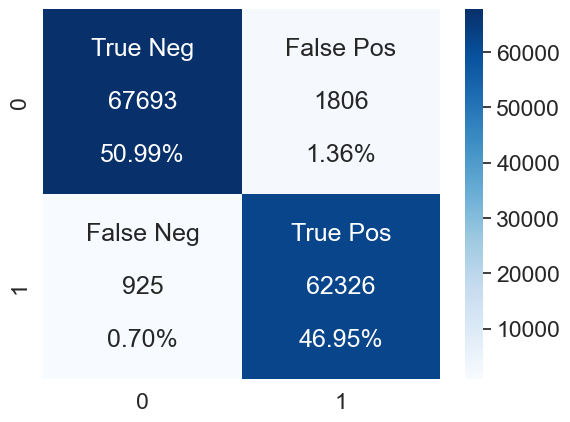

In [138]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sbb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
sbb.set(font_scale=1.5)

plt.savefig('confusion_matrix.png', dpi=300)


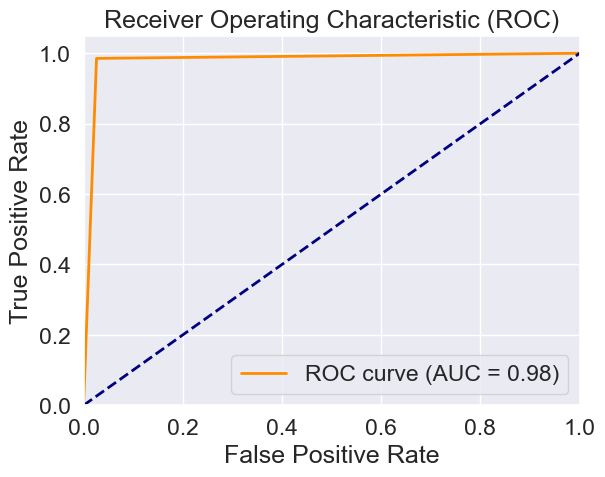

In [187]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have obtained predicted probabilities and true labels for your test dataset
# predicted_probs: predicted probabilities for the positive class
# true_labels: true labels for the test instances (0 or 1)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")


plt.savefig('roc_curve.png', dpi = 300)
plt.show()


